# Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
# load the data
raw_df=pd.read_csv("train.csv")
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_df.shape

(1460, 81)

# Data Cleansing  

In [5]:
# check missing values
missing=pd.DataFrame(raw_df.isnull().sum())
missing_values=missing[missing[0]!=0]
missing_values

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [6]:
# we can see the percentages of missing values of 
# Alley,FireplaceQu ,PoolQC, Fence, and MiscFeature are more than 40% 
# So  I will simply remove those columns
df=raw_df.drop(columns=["Alley","FireplaceQu",'PoolQC', 'Fence','MiscFeature']).dropna(axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Feature Engineering

In [7]:
new_df=df.copy()

In [8]:
num_col=['LotFrontage','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
        '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea',
        'GarageYrBlt','GarageArea','WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
        'PoolArea', 'MiscVal']

In [9]:
# to find all columns that contain "str" values
cat_col=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageCars', 'MoSold', 'YrSold','MSSubClass', 'OverallQual', 'OverallCond']
for i in range(len(new_df.columns)):
    if type(new_df[new_df.columns[i]][0])==str:
        cat_col.append(new_df.columns[i])

In [10]:
# Encode the catogorical data
from sklearn import  preprocessing
# create a function to transform the data 
def encode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [11]:
# apply the function above
for i in new_df[cat_col].columns:
    new_df[i]= encode(new_df[cat_col][i])

In [12]:
new_df.shape,raw_df.shape # double check the size and shape

((1094, 76), (1460, 81))

# Distribution

In [13]:
len(num_col),len(cat_col)

(22, 52)

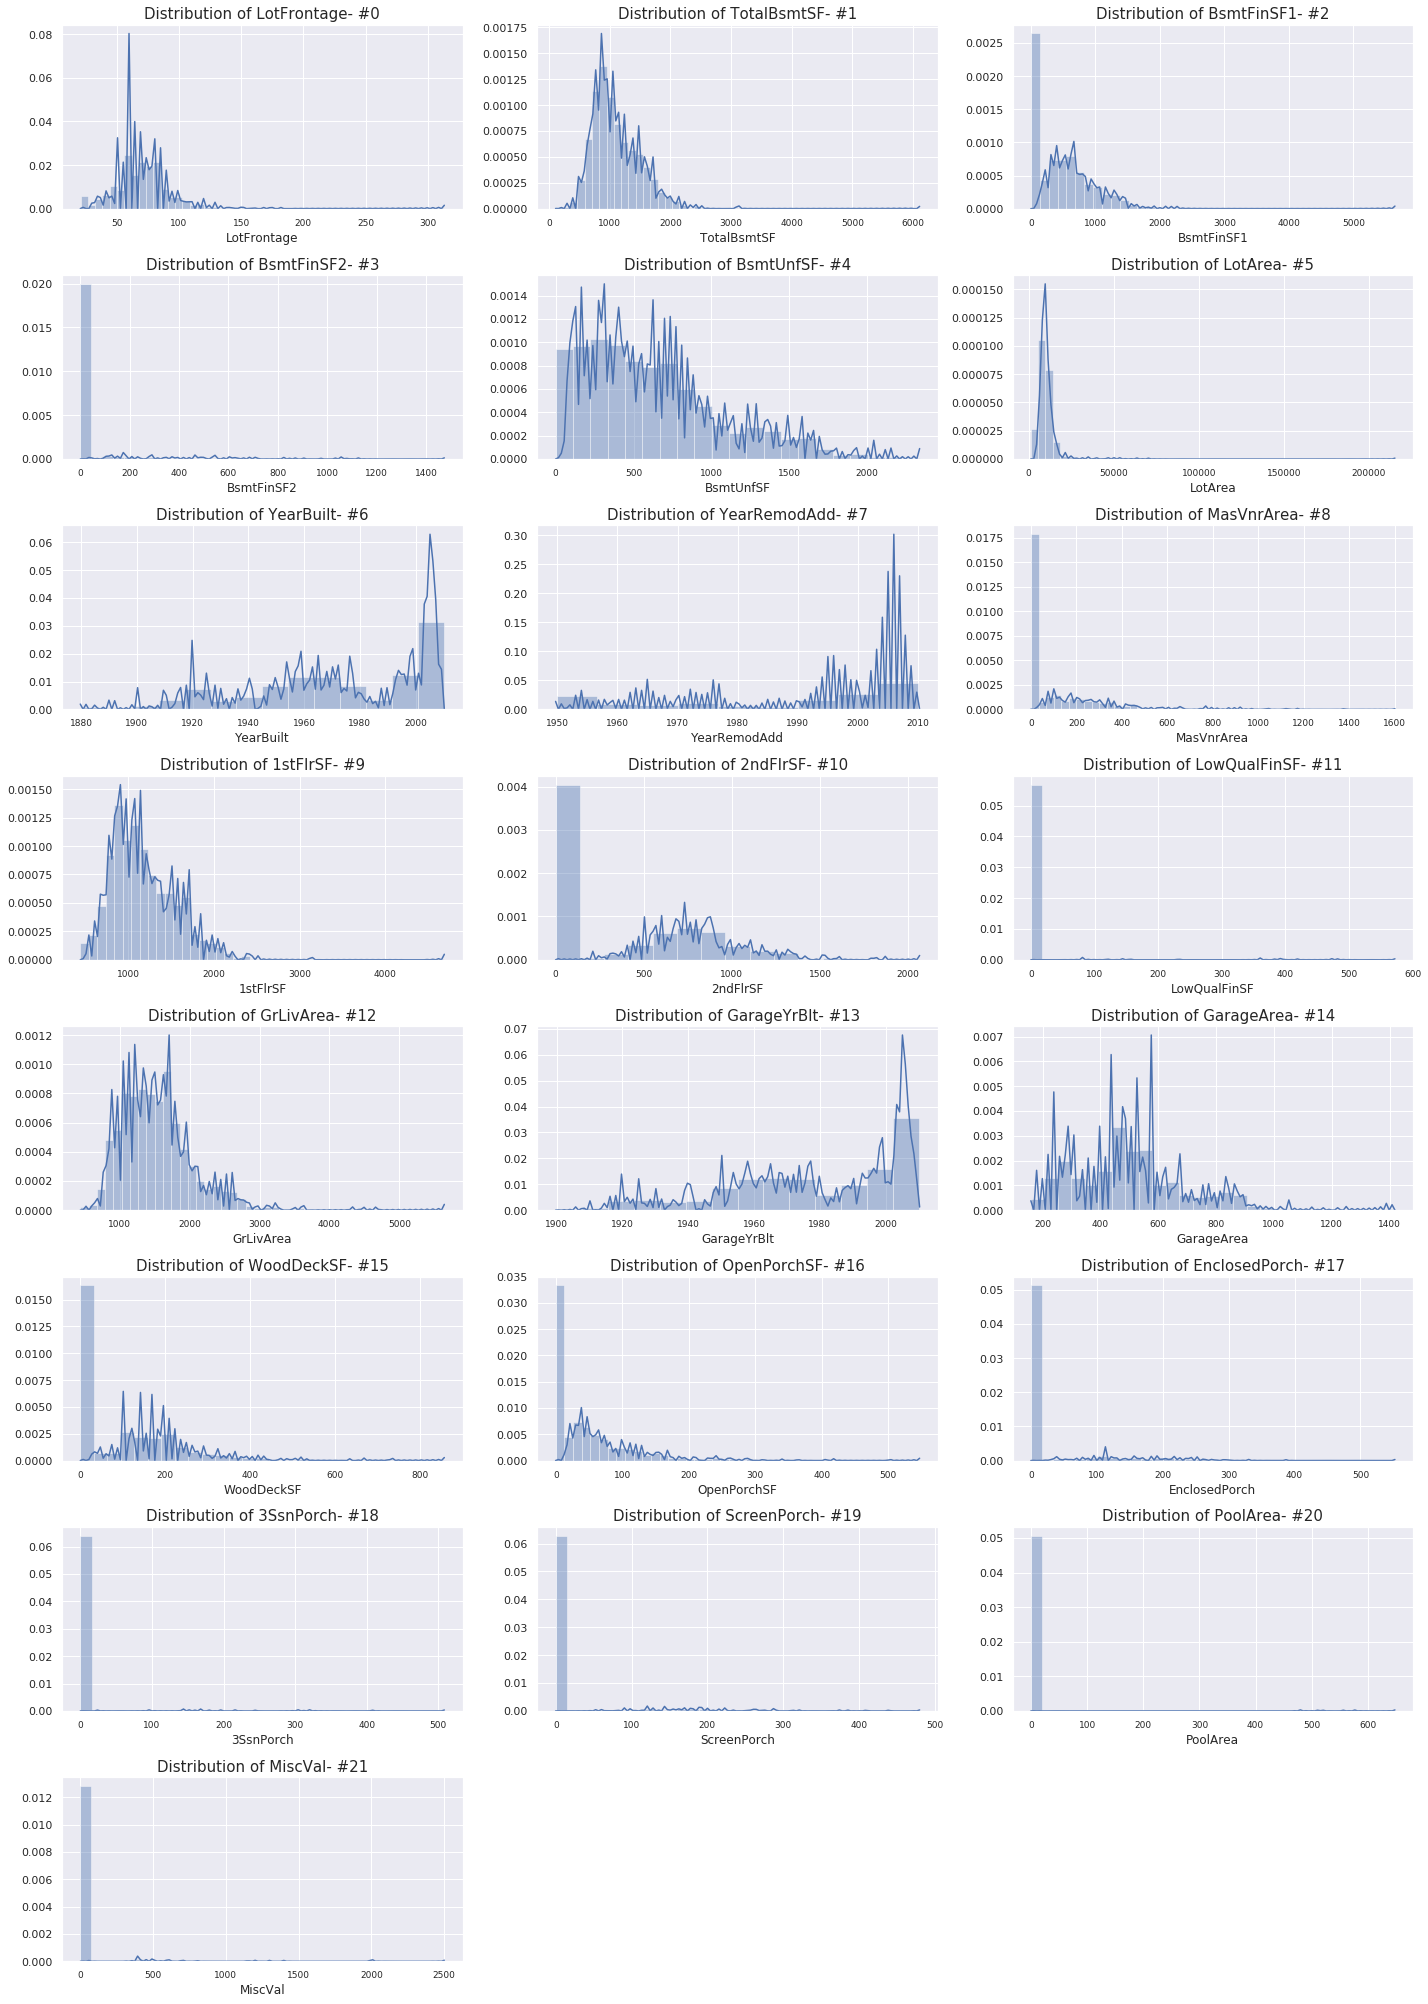

In [14]:
# numerical variabels distributions
plt.figure(figsize=(20,28))
for i in range(0,len(num_col)):
    plt.subplot(8,3,i+1)
    sns.distplot(new_df[num_col[i]],kde_kws={'bw': 0.1})
    plt.title("Distribution of {}- #{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

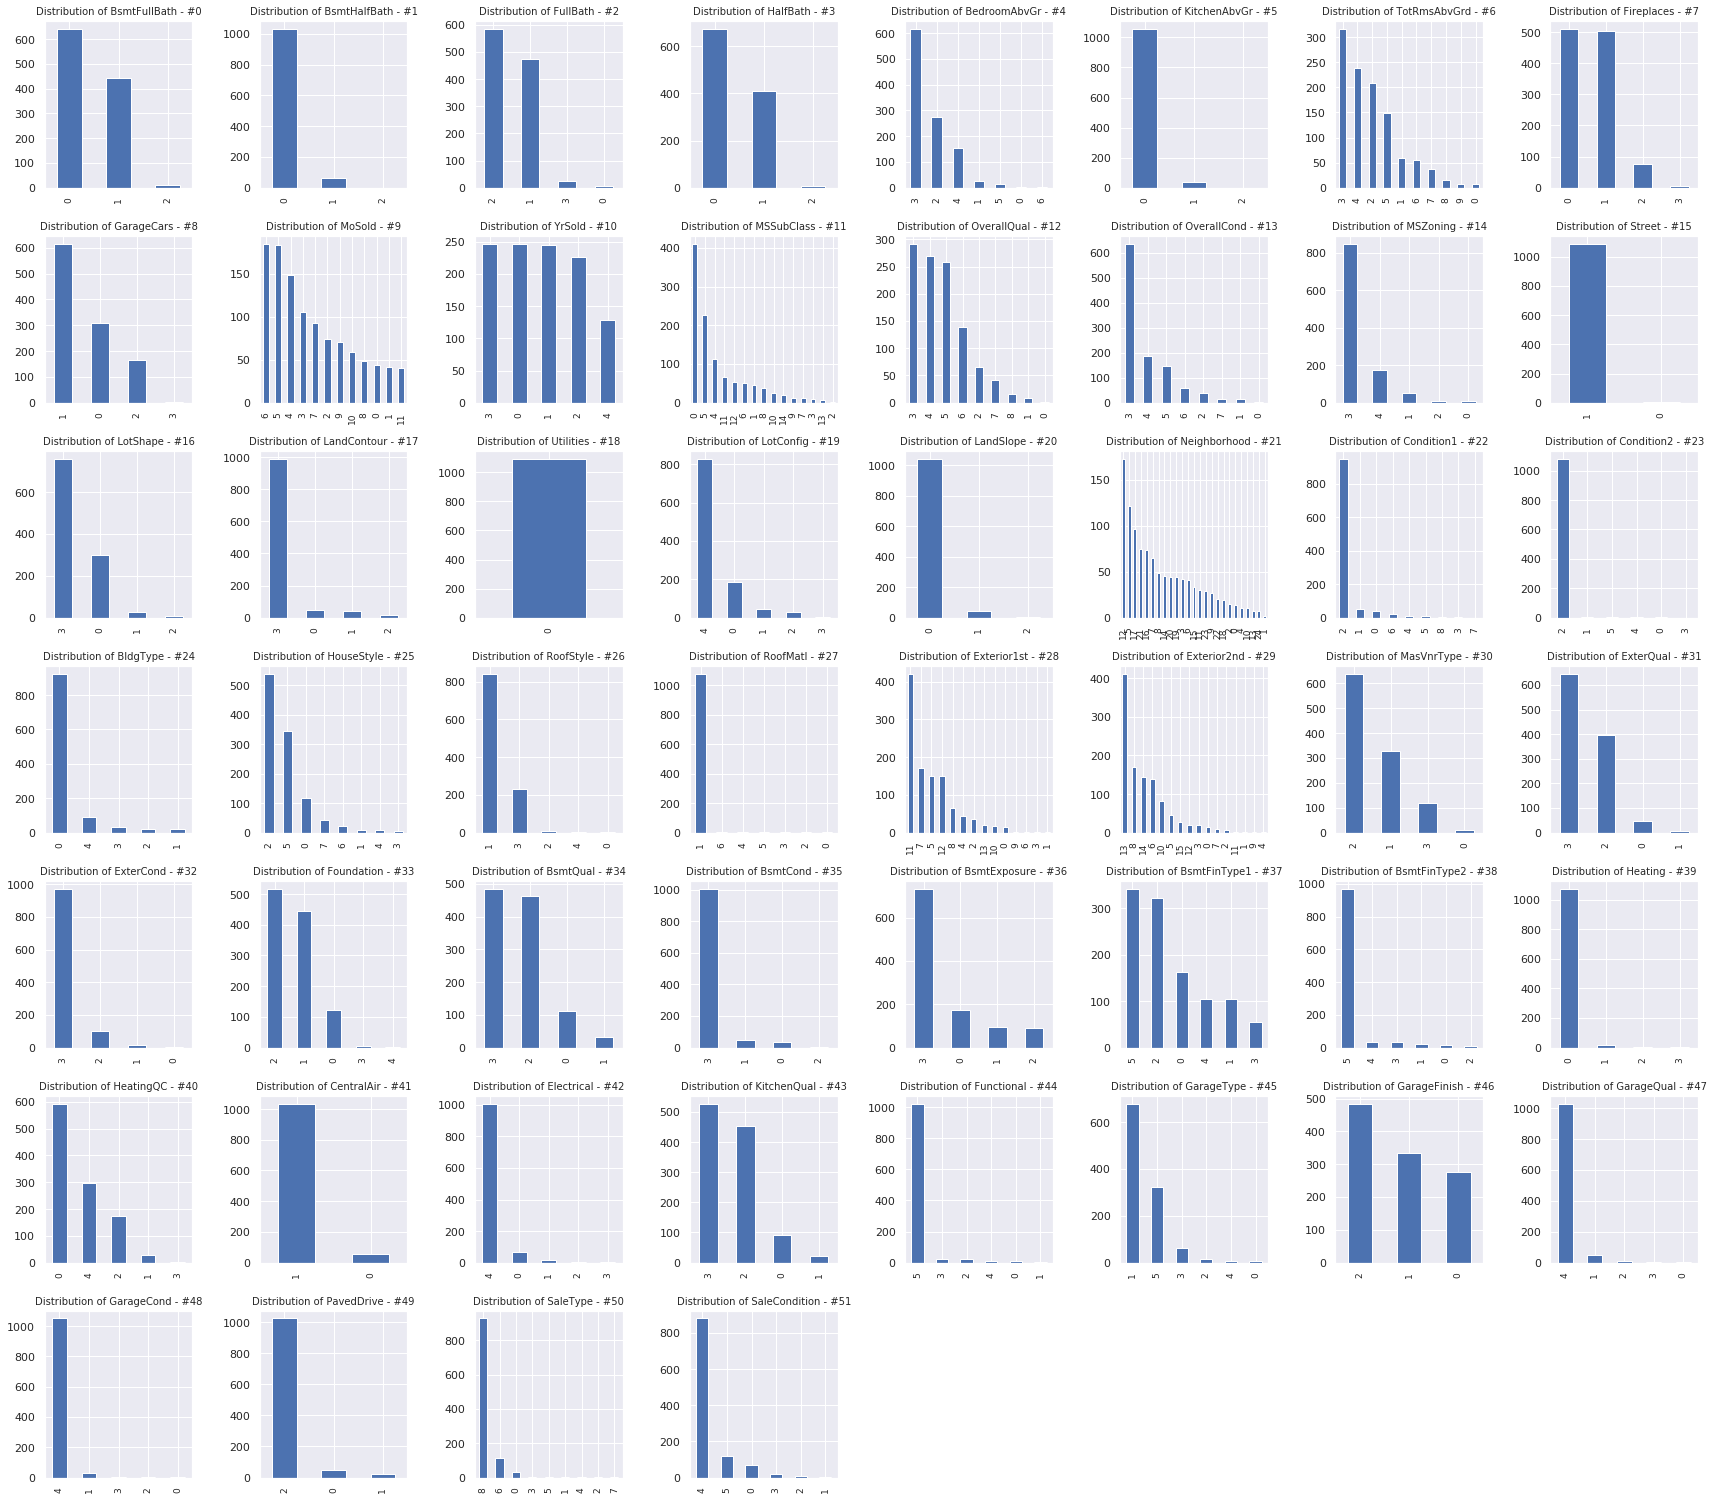

In [15]:
# catogorical data variabels distributions
plt.figure(figsize=(24,21))
for i in range(0,len(cat_col)):
    plt.subplot(7,8,i+1)
    new_df[cat_col[i]].value_counts().plot(kind='bar')
    plt.title("Distribution of {} - #{}".format( cat_col[i], i),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()



In [16]:
# we can see that some variables have "extrem" outliers or only contain sigle value which means those variables are 
# not really help us to explore more and cannot give us more information
# here I will simply remove those kind of variables
remove_index=[ 2,15,17,18,20,23,27,39,41,44,47,48]
remove_col=[cat_col[i] for i in remove_index]
remove_col

['FullBath',
 'Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Functional',
 'GarageQual',
 'GarageCond']

In [17]:
new_df.drop(columns=remove_col,inplace=True) # drop those columns

In [18]:
# update cat_col
for i in remove_col:
    cat_col.remove(i)
    
print(cat_col)# double check

['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSSubClass', 'OverallQual', 'OverallCond', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


In [19]:
new_df.shape,len(cat_col)

((1094, 64), 40)

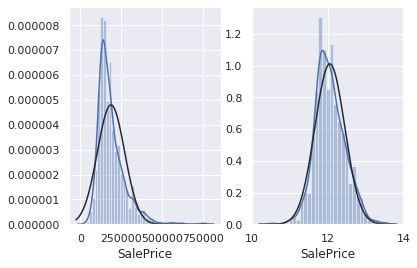

In [20]:
from scipy.stats import norm, skew #for some statistics
plt.subplot(1,2,1)
# distribution of Target
sns.distplot(new_df["SalePrice"],fit=norm)
# Get the fitted parameters used by the function
plt.subplot(1,2,2)
sns.distplot(np.log(new_df["SalePrice"]),fit=norm)


# Feature VS Target

## Numerical Variabels vs Target

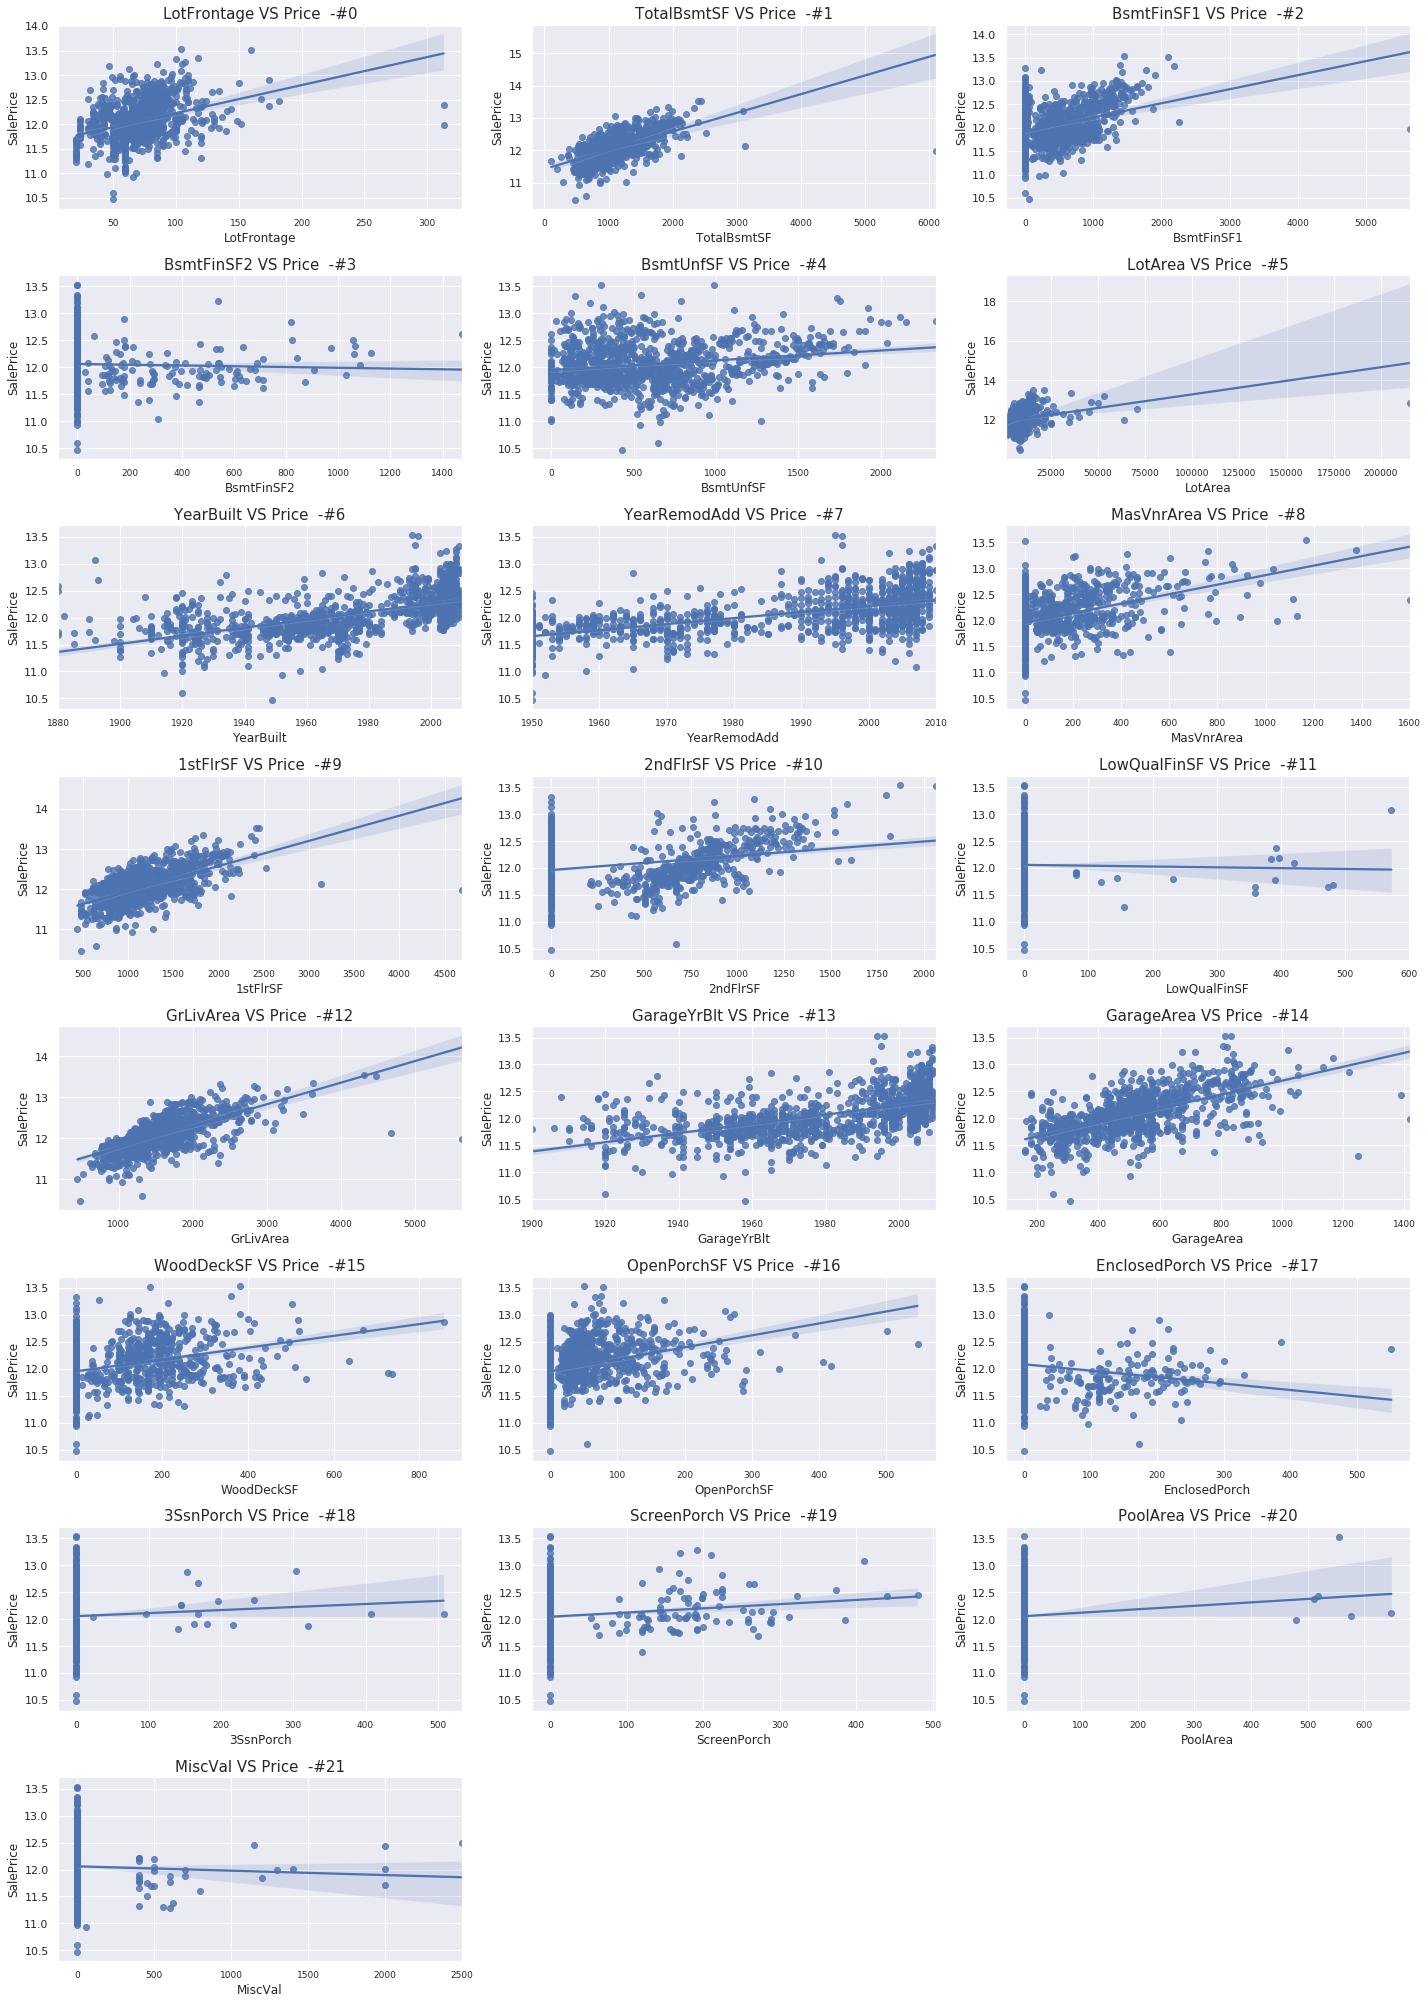

In [21]:
# numerical variabels vs target
plt.figure(figsize=(20,28))
for i in range(0,len(num_col)):
    plt.subplot(8,3,i+1)
    sns.regplot(new_df[num_col[i]],np.log(new_df["SalePrice"]))
    plt.title("{} VS Price  -#{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

# Outliner Removal

In [22]:
# remove outlier for # 0,1,2,5,9,12,14,15 numerical variables 

# create a function to remove outliers 
def outlier_removal(df,col,quantile):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.title('Distribution Before Outlier Removal')
    plt.subplot(1,2,2)
    df_new=df[df[col]<df[col].quantile(quantile)]
    sns.distplot(df_new[col])
    plt.title('Distribution After Outlier Removal')
    plt.tight_layout()
    return df_new

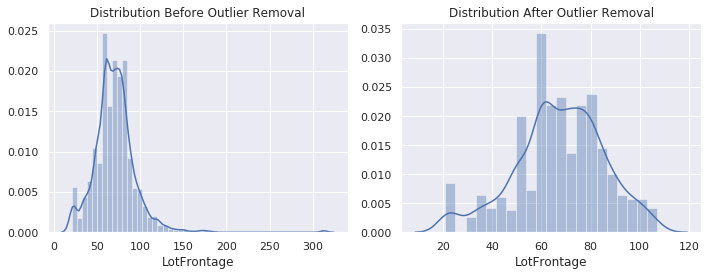

In [23]:
# LotFrontage
new_df1=outlier_removal(new_df,num_col[0],0.95)

TotalBsmtSF


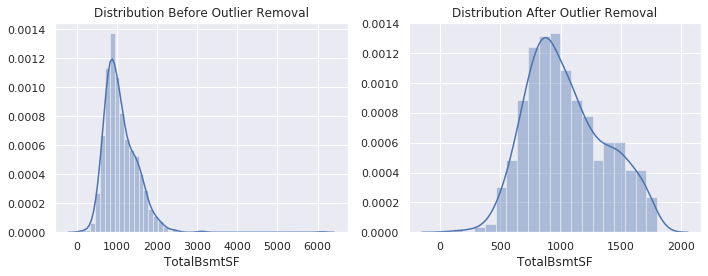

In [24]:
# TotalBsmtSF 0,1,2,5,9,12,14,15
print(num_col[1])
new_df2=outlier_removal(new_df,num_col[1],0.95)

BsmtFinSF1


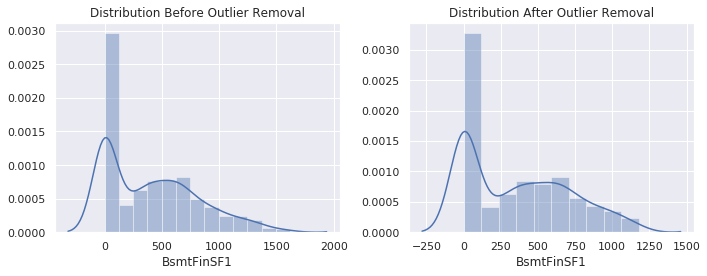

In [25]:
# BsmtFinSF1

print(num_col[2])
new_df3=outlier_removal(new_df2,num_col[2],0.95)

LotArea


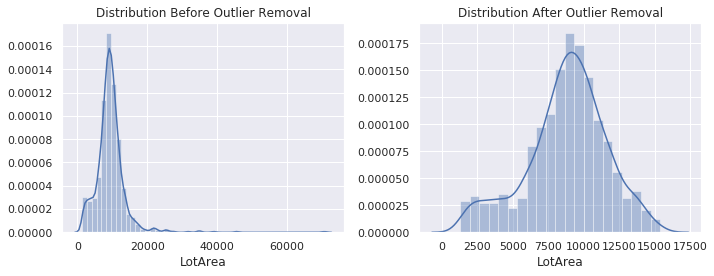

In [26]:
# LotArea
print(num_col[5])
new_df4=outlier_removal(new_df3,num_col[5],0.95)

1stFlrSF


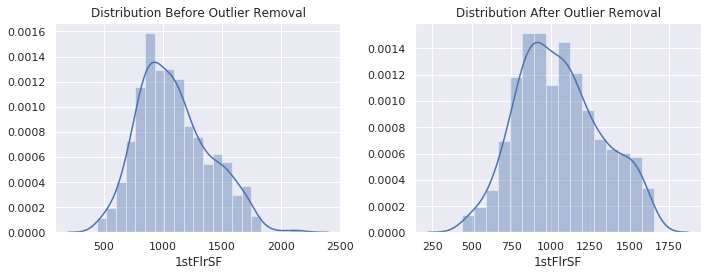

In [27]:
# 1stFlrSF
print(num_col[9])

new_df5=outlier_removal(new_df4,num_col[9],0.95)

GrLivArea


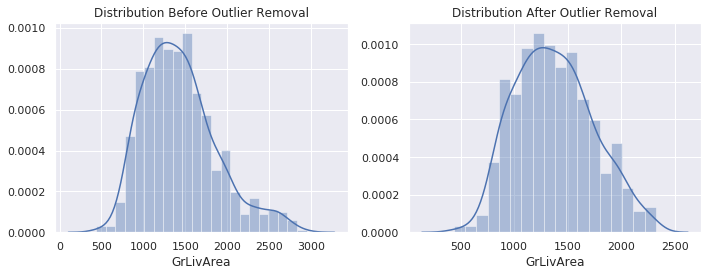

In [28]:
# GrLivArea

print(num_col[12])

new_df6=outlier_removal(new_df5,num_col[12],0.95)

GarageArea


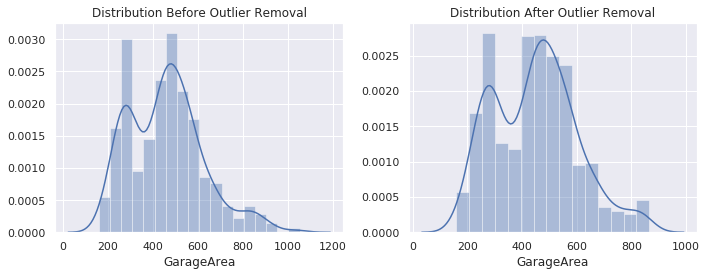

In [29]:
# GarageArea

print(num_col[14])

new_df7=outlier_removal(new_df6,num_col[14],0.98)

WoodDeckSF


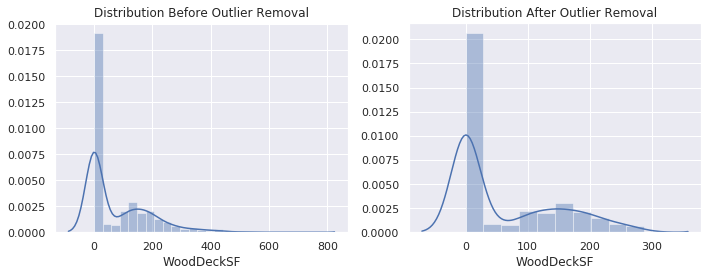

In [30]:
# WoodDeckSF
print(num_col[15])

new_df7=outlier_removal(new_df6,num_col[15],0.95)

In [31]:
# Based on the distribution and the scatter plots
# number [3,11,17,18,19,20,21] variables can be removed from num_col 
# those variables either do not have linearity with independent variable or are not informative
remove_indexs=[3,11,17,18,19,20,21]
remove_cols=[num_col[i] for i in remove_indexs]
remove_cols

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [32]:
# update cat_col
for i in remove_cols:
    num_col.remove(i)
    
print(num_col)# double check

['LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [36]:
# new_df7.drop(columns=remove_cols,inplace=True) # drop those columns

## Catogorical Variabels Distributions

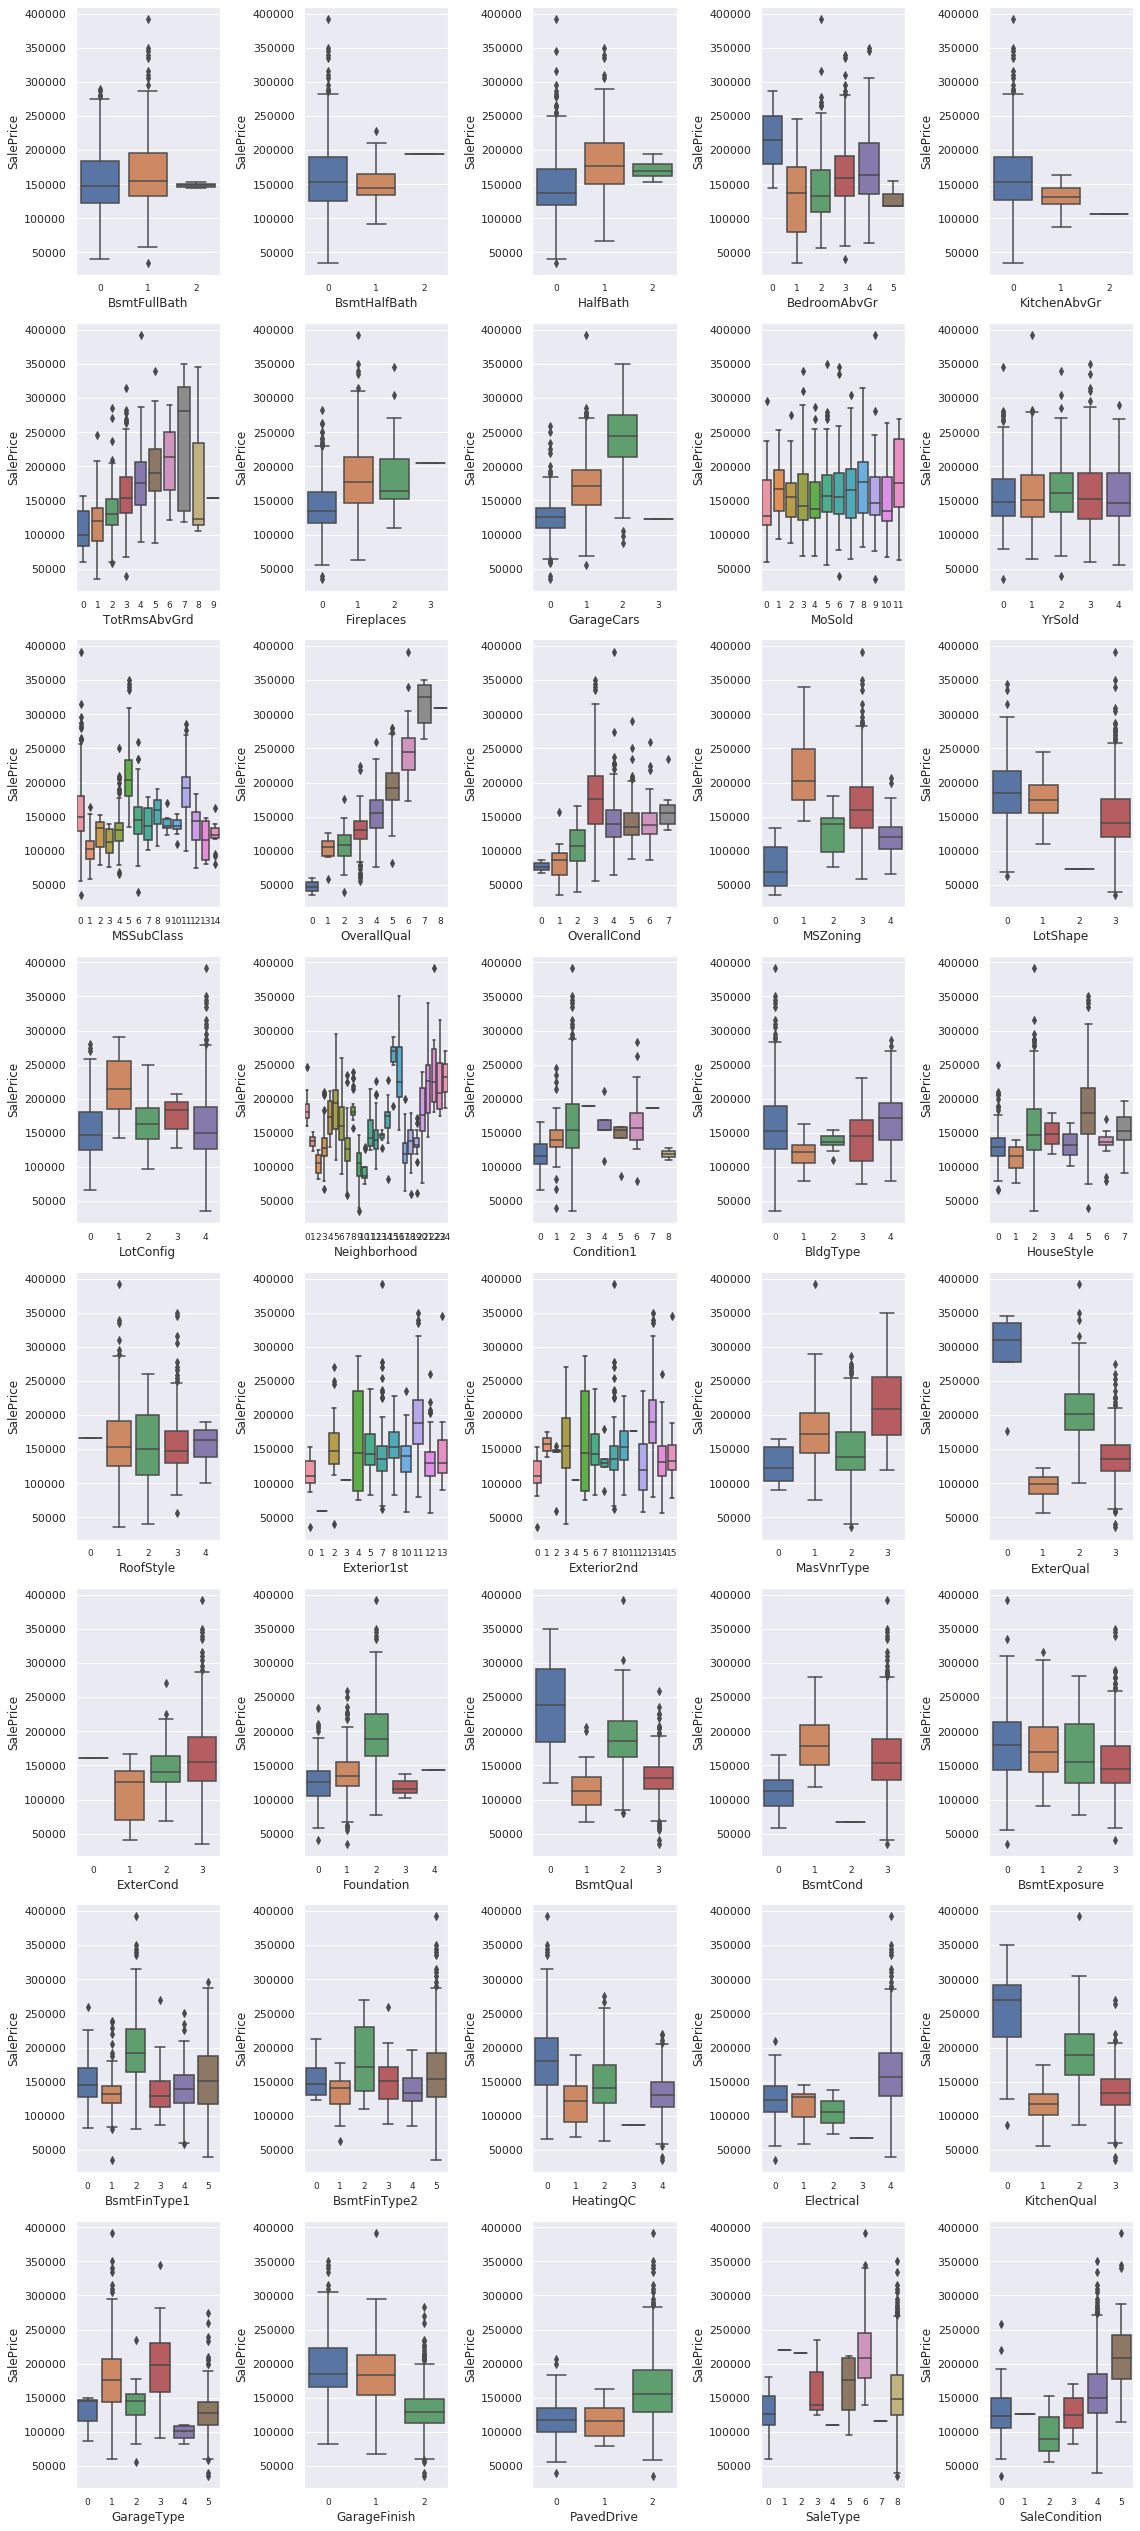

In [35]:
# catogorical variabels distributions
plt.figure(figsize=(16,48))
for i in range(0,len(cat_col)):
    plt.subplot(11,5,i+1)
    sns.boxplot(new_df7[cat_col[i]],new_df7["SalePrice"])
   # plt.title("Distribution of {}".format( cat_col[i]),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()

# Declare input and target

In [127]:
# Declare inputs and target
inputs=new_df7[cat_col+num_col]
target=np.log(new_df7.SalePrice)

# Feature Selection

In [171]:
#prepare our data 
feature_columns=inputs.columns
selected_inputs =pd.DataFrame(data=inputs, columns=feature_columns)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


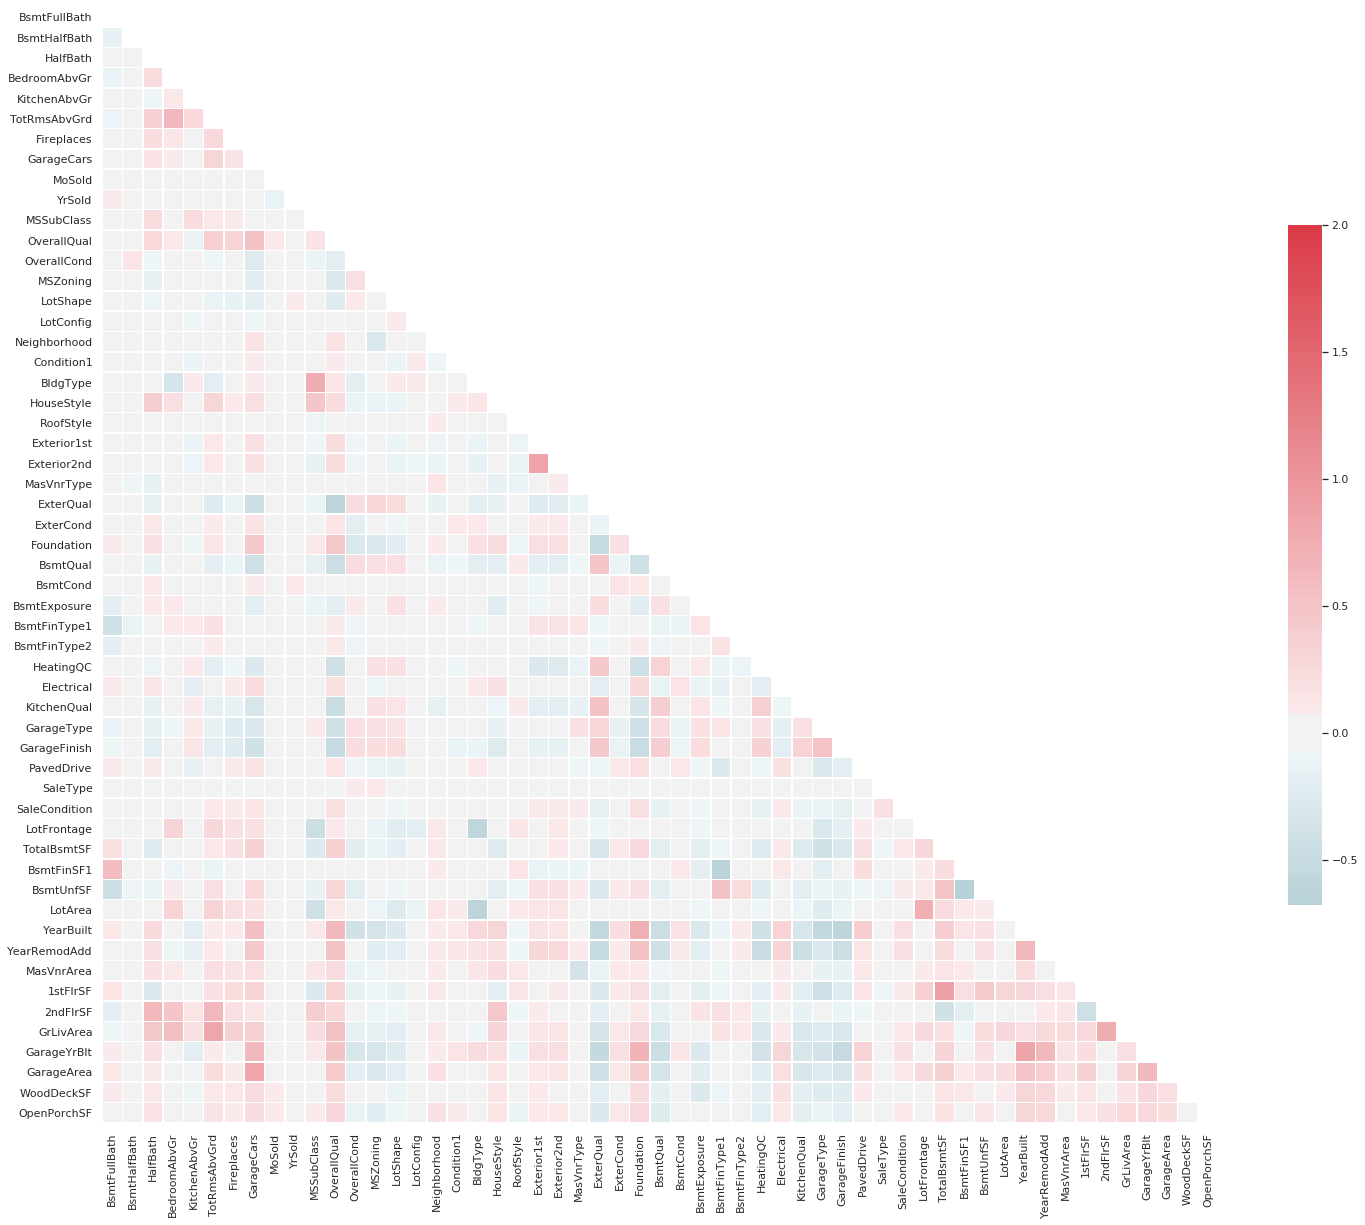

In [172]:
sns.set(style="white")


# Compute the correlation matrix
corr = selected_inputs.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [173]:
# Create correlation matrix
corr_matrix = selected_inputs.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
selected_inputs.drop(columns=to_drop, inplace=True)

len(selected_inputs.columns)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


55

In [163]:
len(inputs.columns) # we can see that there are two columns got removed

55

In [174]:
len(selected_inputs.columns)

55

# Train Test Split

In [175]:
new_feature_cols=selected_inputs.columns

In [176]:
new_inputs=np.array(selected_inputs).astype("float32")
new_target=np.array(target).astype("float32")

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_inputs,new_target,test_size=0.2,random_state=521)

# Random Forest

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


In [179]:
# Number of trees in random forest
n_estimators = list(range(1,100,1))

# Maximum number of levels in tree
max_depth = list(range(1,50))
# Minimum number of samples required to split a node
min_samples_split = list(range(1,30))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,30))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap
              }


In [180]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_

{'n_estimators': 65}

In [181]:
# Evaluate Random Search
rf_random.best_score_

0.8328303781161341

In [182]:
# Random Forest model with best parameters
rfr= RandomForestRegressor(n_estimators=rf_random.best_params_["n_estimators"],
#                            max_features=rf_random.best_params_["max_features"],
#                             max_depth=rf_random.best_params_["max_depth"], 
#                             min_samples_split=rf_random.best_params_["min_samples_split"],
#                             min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
#                            bootstrap=rf_random.best_params_['bootstrap'],
                           n_jobs=-1, 
                           random_state=46)
rfr.fit(inputs_scaled,target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=65, n_jobs=-1, oob_score=False,
                      random_state=46, verbose=0, warm_start=False)

In [183]:
#Scores for Train data and test data
rf_y_train_pre=rfr.predict(x_train)
print('Accuracy score of train data :{}'.format(rfr.score(x_train,y_train)))
rf_y_test_pre=rfr.predict(x_test)
print('Accuracy score of validation data :{}'.format(rfr.score(x_test,y_test)))


Accuracy score of train data :-3.359258321729765
Accuracy score of validation data :-3.3272906372681623


In [184]:
#RMSE
def RMSE(actual,prediction):
    rmse=np.sqrt(mean_squared_error(actual, prediction))
    return rmse

In [185]:
print('RMSE - {}'.format(RMSE(y_test,rf_y_test_pre)))

RMSE - 0.6282644392490503


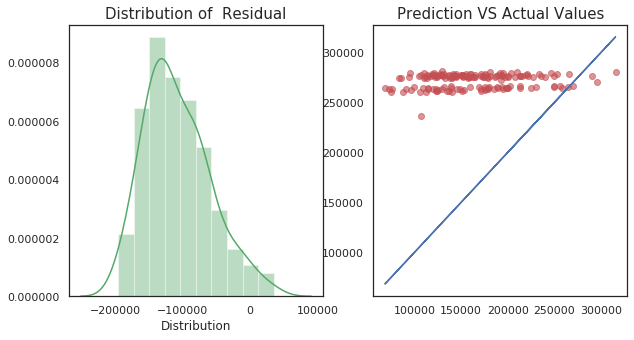

In [186]:
# distribution of residual
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(np.exp(y_test)-np.exp(rf_y_test_pre),color='g')
plt.title('Distribution of  Residual', fontsize=15)
plt.xlabel('Distribution')

plt.subplot(1,2,2)
plt.scatter(np.exp(y_test), np.exp(rf_y_test_pre),color='r',alpha=0.6)
plt.plot(np.exp(y_test),np.exp(y_test))
plt.title('Prediction VS Actual Values',fontsize=15)
plt.show()

# Load the test data

In [187]:
# load the data
raw_test_df=pd.read_csv('test.csv')
raw_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [188]:
raw_test_df.shape

(1459, 80)

In [189]:
# select the same columns from train data 

test_df=raw_test_df[cat_col+num_col]# rename it
test_df.head()# first five rows

,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,...,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,0.0,0.0,0,2,1,5,0,1.0,6,2010,...,1961,1961,0.0,896,0,896,1961.0,730.0,140,0
1,0.0,0.0,1,3,1,6,0,1.0,6,2010,...,1958,1958,108.0,1329,0,1329,1958.0,312.0,393,36
2,0.0,0.0,1,3,1,6,1,2.0,3,2010,...,1997,1998,0.0,928,701,1629,1997.0,482.0,212,34
3,0.0,0.0,1,3,1,7,1,2.0,6,2010,...,1998,1998,20.0,926,678,1604,1998.0,470.0,360,36
4,0.0,0.0,0,2,1,5,0,2.0,1,2010,...,1992,1992,0.0,1280,0,1280,1992.0,506.0,0,82


# Data Cleaning

In [190]:
# data cleansing
test_df.isnull().sum()

BsmtFullBath       2
BsmtHalfBath       2
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
MoSold             0
YrSold             0
MSSubClass         0
OverallQual        0
OverallCond        0
MSZoning           4
LotShape           0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
HeatingQC          0
Electrical         0
KitchenQual        1
GarageType        76
GarageFinish      78
PavedDrive         0
SaleType           1
SaleCondition      0
LotFrontage      227
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea   

In [191]:
# fill out the missing values with mode for catogorical data
for column in cat_col:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [192]:
test_df[cat_col].isnull().sum()# double check the missing values

BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
MoSold           0
YrSold           0
MSSubClass       0
OverallQual      0
OverallCond      0
MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
Electrical       0
KitchenQual      0
GarageType       0
GarageFinish     0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [193]:
# encode the data
for col in cat_col:
    test_df[col]=encode(test_df[col])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [194]:
test_df[cat_col].head()# take a look at the transformed data

,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,0,0,0,2,1,2,0,1,5,4,...,4,3,4,3,3,1,2,2,8,4
1,0,0,1,3,1,3,0,1,5,4,...,0,5,4,3,2,1,2,2,8,4
2,0,0,1,3,1,3,1,2,2,4,...,2,5,2,3,3,1,0,2,8,4
3,0,0,1,3,1,4,1,2,5,4,...,2,5,0,3,2,1,0,2,8,4
4,0,0,0,2,1,2,0,2,0,4,...,0,5,0,3,2,1,1,2,8,4


In [195]:
# beside catogorical data , we also need to clean numerical data
test_df[num_col].isnull().sum().reset_index()

,index,0
0,LotFrontage,227
1,TotalBsmtSF,1
2,BsmtFinSF1,1
3,BsmtUnfSF,1
4,LotArea,0
5,YearBuilt,0
6,YearRemodAdd,0
7,MasVnrArea,15
8,1stFlrSF,0
9,2ndFlrSF,0


In [196]:
missing_col=[
 'LotFrontage',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'MasVnrArea',
 'GarageYrBlt',
 'GarageArea']

In [197]:
# fill out the data 
for col in missing_col:
    test_df[col].fillna(test_df[col].median(),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [198]:
test_df.isnull().sum()# now there is not any  missing values

BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
MoSold           0
YrSold           0
MSSubClass       0
OverallQual      0
OverallCond      0
MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
Electrical       0
KitchenQual      0
GarageType       0
GarageFinish     0
PavedDrive       0
SaleType         0
SaleCondition    0
LotFrontage      0
TotalBsmtSF      0
BsmtFinSF1       0
BsmtUnfSF        0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageYrBlt      0
GarageArea  

In [201]:
# standardization
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(test_df[new_feature_cols])
# Scale the features and store them in a new variable (the actual scaling procedure)
scaled_test_input = scaler.transform(test_df[new_feature_cols])

In [202]:
# Now use the model to predict
test_df_prediction=rfr.predict(scaled_test_input)

In [203]:
np.exp(test_df_prediction)

array([122354.21657971, 146425.45148411, 182105.56351247, ...,
       145435.63632503, 134750.25429589, 208257.07789821])

# Submision

In [204]:
submision=pd.DataFrame()
submision['Id']=raw_test_df['Id']
submision['SalePrice']=np.exp(test_df_prediction)
submision.head()

,Id,SalePrice
0,1461,122354.216580
1,1462,146425.451484
2,1463,182105.563512
3,1464,180039.270664
4,1465,185978.968290


In [205]:
submision.to_csv('submision.csv',index=False)

In [206]:
submision.shape

(1459, 2)

# Train a linear regression model using sagemaker

## import necessary packages

In [207]:
import sagemaker
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2
import boto3
from sagemaker import Session



## Create a Sagemaker session

In [208]:
sagemaker_session = sagemaker.Session()
bucket = 'melanie-sagemaker-practice'
prefix = 'Housing_Price_Project'  # prefix is the folder within the S3 bucket.

# Let's get the execution role for the notebook instance -> IAM role 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::347638145054:role/service-role/AmazonSageMaker-ExecutionRole-20220201T224030


In [209]:
x_train.shape

(640, 55)

In [210]:
y_train.shape

(640,)

In [211]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, x_train, y_train.reshape(-1))
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 

0

In [214]:
import os
# define the key
key="housing-price-train-data"
# uploads the data in record io format to s3 bucket to be accessed later for training
boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix,"train",key)).upload_fileobj(buf)

# find out the traning data location in S3
s3_train_data="s3://{}/{}/train/{}".format(bucket,prefix,key)
print("uploaded training data location: {}".format(s3_train_data))

uploaded training data location: s3://melanie-sagemaker-practice/Housing_Price_Project/train/housing-price-train-data


In [216]:
# create an output placeholder in s3 bucket to store the linear learner output
output_location="s3://{}/{}/output".format(bucket,prefix)
print("Training artifacts will be uploaded to: {}".format(output_location))

Training artifacts will be uploaded to: s3://melanie-sagemaker-practice/Housing_Price_Project/output


In [217]:
# to get the training container of sagemaker built-in algorithms
from sagemaker.amazon.amazon_estimator import get_image_uri
container=get_image_uri(boto3.Session().region_name,"linear-learner")

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [219]:
# set up the parameters
linear=sagemaker.estimator.Estimator(container,
                                     role,
                                     train_instance_count=1,
                                     train_instance_type="ml.c4.xlarge",
                                     output_path=output_location,
                                     sagemaker_session=sagemaker_session,
                                     train_use_spot_instances=True,  # we can add this to reduce the bill by using spot-instance
                                      train_max_run=300,
                                      train_max_wait=600)
# tune the parameters 
linear.set_hyperparameters(feature_dim=55,
                          predictor_type="regressor",
                          mini_batch_size=100,
                          epochs=100,
                          num_models=32,
                          loss="absolute_loss")
# pass in the traning data from s3 to train the linear learner model
linear.fit({"train":s3_train_data})


train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_use_spot_instances has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_wait has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2022-02-03 04:25:09 Starting - Starting the training job...
2022-02-03 04:25:23 Starting - Launching requested ML instancesProfilerReport-1643862308: InProgress
.........
2022-02-03 04:27:05 Starting - Preparing the instances for training............
2022-02-03 04:29:09 Downloading - Downloading input data
2022-02-03 04:29:09 Training - Downloading the training image...
2022-02-03 04:29:29 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[02/03/2022 04:29:36 INFO 139763932251968] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_meth

# Deploy and test the trained model

In [220]:
linear_regressor=linear.deploy(initial_instance_count=1,
                              instance_type="ml.m4.xlarge")

----------!

In [226]:
from sagemaker.predictor import csv_serializer,json_deserializer

linear_regressor.serializer=csv_serializer
linear_regressor.deserializer=json_deserializer

In [229]:
# making prediction on the test data
pre_y_test=linear_regressor.predict(x_test)

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [230]:
pre_y_test

{'predictions': [{'score': 12.140616416931152},
  {'score': 12.360304832458496},
  {'score': 11.95174789428711},
  {'score': 11.511605262756348},
  {'score': 12.020350456237793},
  {'score': 11.634320259094238},
  {'score': 12.047026634216309},
  {'score': 12.456061363220215},
  {'score': 12.066941261291504},
  {'score': 11.854744911193848},
  {'score': 11.839404106140137},
  {'score': 11.720585823059082},
  {'score': 11.911931991577148},
  {'score': 11.903780937194824},
  {'score': 12.53596019744873},
  {'score': 11.679478645324707},
  {'score': 12.040412902832031},
  {'score': 12.059511184692383},
  {'score': 11.73940372467041},
  {'score': 11.717328071594238},
  {'score': 11.831483840942383},
  {'score': 12.28538990020752},
  {'score': 11.764483451843262},
  {'score': 12.309348106384277},
  {'score': 12.043814659118652},
  {'score': 11.963144302368164},
  {'score': 11.694663047790527},
  {'score': 12.029213905334473},
  {'score': 12.142049789428711},
  {'score': 12.057835578918457},

In [232]:
prediction=np.array([r["score"] for r in pre_y_test["predictions"]])

In [233]:
# prediction_reverse=[np.exp(i) for i in prediction]

In [235]:
from sklearn.metrics import r2_score,mean_squared_error
RMSE=np.sqrt(mean_squared_error(prediction,y_test))
MSE=mean_squared_error(prediction,y_test)
r2=r2_score(prediction,y_test)
print("RMSE: {}".format(RMSE))
print("MSE: {}".format(MSE))
print("r2: {}".format(r2))


RMSE: 0.1016497274853713
MSE: 0.010332667097850249
r2: 0.8729877164936078


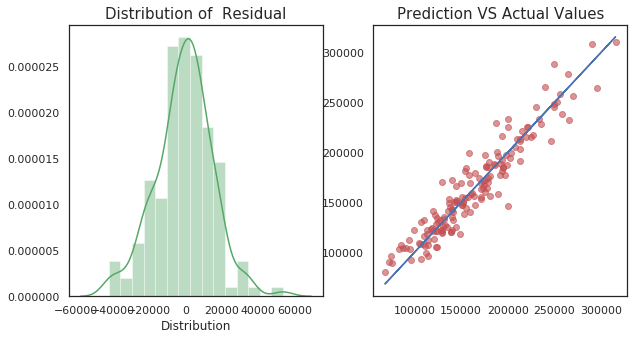

In [236]:
# distribution of residual
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(np.exp(y_test)-np.exp(prediction),color='g')
plt.title('Distribution of  Residual', fontsize=15)
plt.xlabel('Distribution')

plt.subplot(1,2,2)
plt.scatter(np.exp(y_test), np.exp(prediction),color='r',alpha=0.6)
plt.plot(np.exp(y_test),np.exp(y_test))
plt.title('Prediction VS Actual Values',fontsize=15)
plt.show()

In [237]:
# Delete the end-point
linear_regressor.delete_endpoint()